# [1] Extrair Informação das Ações

Instalar Packages

In [ ]:
!pip install yfinance
#!pip install stocker

     |████████████████████████████████| 5.5MB 2.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=6dd7569f9a63c571f2c4204ffaf247841f187d041f74771a3d0758b893bac71c
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
#import pandas_datareader.data as web
#import stocker

Extrair Info (Yahoo e Pandas data reader) - esclarecer OHLC - fazer plot simples usando pandas .plot

One Ticker Object

In [ ]:
#Docs: https://pypi.org/project/yfinance/

##Analise da Tesla


#One Ticker
msft = yf.Ticker("MSFT")

type(msft) #Ticker object com multiplos atributos

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
#msft.financials
#msft.quarterly_financials

# show major holders
#msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
#msft.balance_sheet
#msft.quarterly_balance_sheet

# show cashflow
#msft.cashflow
#msft.quarterly_cashflow

# show earnings
#msft.earnings
#msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations - o que são estas recomendações?!?!?
msft.recommendations

# show next event (earnings, etc)
#msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
#msft.isin

# show options expirations
#msft.options

# get option chain for specific expiration
#opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

In [ ]:
msft.info


Multiple Tickers Objects

In [ ]:
tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects

# access each ticker using (example)
#tickers.tickers[0].info
tickers.tickers.MSFT.info
tickers.tickers.AAPL.history(period="1mo")
tickers.tickers.GOOG.actions

Extrair info em massa

In [ ]:
#Extrair dados de um ativo
data = yf.download('^GSPC','2016-01-01','2020-12-10').reset_index()

#Significado de cada coluna
#Adjusted Close? Impacto do stock split, etc
#Volume? Nº de ações trocadas naquele dia?

data['Date'].max()
#data.head()

data.Close.plot() #https://www.geeksforgeeks.org/python-pandas-series-plot-method/

In [ ]:
#Extrair dados de um indice (S&P500)
#data = yf.download('^GSPC','2016-01-01','2020-10-10').reset_index()

# # Plot the close prices 
# import matplotlib.pyplot as plt 
# data.Close.plot()
# plt.show()

In [ ]:
#Using pandas_datareader
#from pandas_datareader import data

#panel_data = data.DataReader('MSFT', 'yahoo', '2016-01-01', '2020-10-10')
#panel_data = data.DataReader('^GSPC', 'yahoo', '2016-01-01', '2020-10-10')
#panel_data.head()

#grafico = panel_data.Close.plot()

Extrair Info de Múltiplas Ações


In [ ]:
#Extrair SP500
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
type(table)
len(table)
table[0]
#table[1]
df = table[0]
df.head()

In [ ]:
#Extrair para 5 empresas
#start = '2019-01-01'
#end = '2020-12-31'

#Metodo 1
#base = yf.download(df['Symbol'][0],start,end).reset_index()[['Date','Adj Close']]
#base.columns = ['Date',df['Symbol'][0]]
#for ticker in df['Symbol'][1:5]:
#  data = yf.download(ticker,start,end).reset_index()[['Adj Close']]
#  data.columns = [ticker]
#  base = base.join(data)
tickers

In [ ]:
#Metodo 2 (Mais Eficiente)
tickers = ' '.join(df['Symbol'].to_list())
data = yf.download(tickers,start,end)
#data['Adj Close'].reset_index().columns
data.head()
##data.columns

Outra Info que permite extrair

In [ ]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

In [ ]:
start = '2019-01-01'
end = '2020-12-31'

#Metodo 2 (Mais Eficiente)
tickers = ' '.join(df['Symbol'].to_list())
data = yf.download(tickers,start,end,group_by='ticker')
#data['Adj Close'].reset_index().columns
data['ABT'].head()
##data.columns

# [2] Guardar Info em Excel/Integrar com o Google Collab



**Carregar dataset**

In [ ]:
#input_data = data.MSFT
input_data = data

**Openpyxl**

Escrever e ler dados apartir de um ficheiro de excel

In [ ]:
import openpyxl as oxl

#Create/Write Workbooks
wb = oxl.Workbook()
ws = wb.create_sheet(index=0,title='sheet_oxl')

#Ciclo para escrever dataset
for c in range(input_data.shape[0]):
  for r in range(input_data.shape[1]):
    ws.cell(row=r+1, column=c+1).value = input_data.iloc[c,r]
    # creates a Cell object and assigns a value

#Save
path = '/content/'
wb.save(path + 'oxl_book.xlsx')

#Mostrar Ficheiro Final de Excel

In [ ]:
##Carregar um ficheiro de Excel
wb = oxl.load_workbook(path + '/oxl_book.xlsx')
ws = wb.active

Caso pretenda saber quais as **worksheets** que estão dentro de um **workbook**

In [ ]:
#Get Sheet Names (retorna lista)
wb.sheetnames #['sheet_oxl', 'Sheet']

In [ ]:
#Get Worksheet by name
ws = wb.get_sheet_by_name('sheet_oxl')

Aceder a **celulas** dentro do **Worksheet**

In [ ]:
cell = ws['B4']
cell.column #B
cell.row #4
cell.value #2004

In [ ]:
## Print Multiple Values (usar range)
ws['B1':'B4']
for cell in ws['B1':'B4']:
  print(cell[0].value)

type(ws['B1':'B4']) #tuple
type(ws['B1':'B4'][0][0]) #<Cell 'sheet_oxl'.B1>

**Pandas: Função read_excel / to_excel**

Gravar/Ler dados de ficheiros de excel através do pandas.

*Método mais simples*


In [ ]:
#Save data into Excel File (Workbook name + sheetname)
input_data.to_excel(path+'workbook_1.xlsx','my_sheet')

In [ ]:
#Read Excel File
df1 = pd.read_excel(path+'workbook_1.xlsx','my_sheet')

--------------------- Conteúdo vídeo

**Objetivo do Vídeo**
Como guardar os dados extraidos das ações através do google sheets?

**Estrutura Vídeo**
Bilioteca Gspread
- Realizar autenticação
- Planilha (Spreadsheet)
  - Criar Planilha
  - Guardar Dados de ações na Planilha
  - Abrir Planilha (URL + Nome)
- Pagina (WorkSheet)
  - Criar Página
  - Apagar Página
  - Mudar Nome da Página
- Update Células
- Integrar com Pandas
  - Guardar dados
  - Importar Dados

Extra: bilioteca gspread_dataframe
- Importar dados
- Guardar dados


**Google Sheets**

Integrar python com google sheets

In [ ]:
#A função update só funciona se for feito o upgrade do package gspread
#O pip update permite atualizar a versão do GSPREAD que está instalado no GOOGLe Colab
#Garante que estamos a usar a versão mais recente!
#Importante este passo pois de outra forma vai dar erro
!pip install --upgrade gspread

De forma a interagir com a API do google sheets é necessário fazer a **autenticação**

In [ ]:
#Youtube: https://www.youtube.com/watch?v=8vKvsLTLDzs
#doc: https://gspread.readthedocs.io/en/latest/user-guide.html
#Acessar google sheets atraves da API: https://gspread.readthedocs.io/en/latest/oauth2.html#service-account
#API para interagir com o google sheets

#Permitir ao Google Colab que interaja com ficheiros como os do google sheets
from google.colab import auth
auth.authenticate_user()

In [ ]:
#gspread is a Python API for Google Sheets - permitir interagir com as folhas de calculo/planilhas
import gspread

#Login to Google API using OAuth2 credentials. 
#An instance of this class communicates with Google API
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default()) #Retorna uma instancia que pode comunicar com a API do Google!

**Interagir com a Folha de calculo (SpreadSheet)**

Como **criar um ficheiro** de Google Sheets

1.   Mostrar Output




In [ ]:
#Create Workbook/Spreadsheet
folha_calculo = gc.create('Dados Microsoft') #planilha

Como **abrir um ficheiro** de Google Sheets

1.   Ficheiro Já existente ('Dados Google')



In [ ]:
## Explicar Estrutura de um ficheiro de Excel/Google Sheets
# Workbook/Spreadsheet -> Worksheet/Spreadsheet -> Column/Row/Cell

#Abrir Workbook com base no URL
folha_calculo = gc.open_by_url('https://docs.google.com/spreadsheets/d/1x3GUrEGVbd6EiUkUH3BPe_I01mXRUkXAwx0-CdZhnh4/edit#gid=0')

In [ ]:
#Abrir WorkBook com base no nome do ficheiro
folha_calculo = gc.open('Dados Google')

**Interagir com Paginas (Worksheet)**



Consultar Lista de Páginas

In [ ]:
#List of worksheets
folha_calculo.worksheets()
#folha_calculo.worksheets()[0]
#pagina = folha_calculo.worksheets()[0]

[<Worksheet 'Cotação' id:0>,
 <Worksheet 'Exercicio' id:1007184009>,
 <Worksheet 'Volume' id:1862447708>,
 <Worksheet 'Dividendos' id:1777794592>]

Criar Worksheet

In [ ]:
folha_calculo.add_worksheet(title="Nova Página", rows="100", cols="20")

<Worksheet 'Nova Página' id:494597492>

Delete Worksheet

In [ ]:
pagina = folha_calculo.worksheets()[3]
folha_calculo.del_worksheet(pagina)

{'replies': [{}],
 'spreadsheetId': '1x3GUrEGVbd6EiUkUH3BPe_I01mXRUkXAwx0-CdZhnh4'}


**Interagir com Células**

Importar Valores

In [ ]:
#Get worksheet/Pagina
pagina = folha_calculo.get_worksheet(0)

#Get Value from cell
pagina.cell(2,1).value

In [ ]:
#Get value from row
pagina.row_values(2)

#Get Value from column
pagina.col_values(1)

In [ ]:
#Get all values (as list)
list_of_lists = pagina.get_all_values()
#list_of_lists

#Get all values (as list of dict) -> cada row = dict
list_of_dict = pagina.get_all_records()

Inserir Valores

In [ ]:
#Add cell/update data in google sheets
pagina.update_acell('D10','Valor') #Params: Cell Label in A1 Notation,Value

pagina.update_cell(3, 4, 'Bingo!') #Params: Row,Column,Value

**Extra**

Formatação

In [ ]:
#Formatação
pagina = folha_calculo.get_worksheet(0)
#dir(worksheet)
pagina.format('A1:B1', {'textFormat': {'bold': True}})

**Pandas e Google Sheets**

Importar dados

In [ ]:
#Selecionar a worksheet
folha_calculo = gc.open('Dados Google') #Get Spreadsheet
pagina = folha_calculo.get_worksheet(1) #Get Worksheet

In [ ]:
## Pandas Dataframe and Google Sheets
import pandas as pd

#Importar dados para dataframe
dataframe = pd.DataFrame(pagina.get_all_records())
dataframe.head()

,Date,High,Low,Close
0,11/29/2019,90,82,87
1,12/2/2019,95,85,87
2,12/3/2019,105,93,97
3,12/4/2019,120,106,114
4,12/5/2019,140,124,133


Inserir dados a partir de um dataframe (estrategia 1: não é a melhor estratégia)

In [ ]:
#Get Data
!pip install yfinance
import yfinance as yf
data = yf.download('^GSPC','2020-01-01','2020-12-10')
data.head()

In [ ]:
#Adjust data
df_stock = data.reset_index()
#df_stock = df_stock.dropna()
df_stock.Date= df_stock.Date.astype(str) #Não funciona com o datetime!
#df_stock.values.tolist()

In [ ]:
#A função update só funciona se for feito o upgrade do package
pagina.update([df_stock.columns.values.tolist()] + df_stock.values.tolist())

#Estrutura lista de listas em que a primeira lista é o header e as seguintes são rows
#[dataframe.columns.values.tolist()] + dataframe.values.tolist()

**Libraria gspread_dataframe**

Forma mais simples de escrever e ir buscar info do google spreadsheet

In [ ]:
#Guardar dataframe numa google spreadhsheet 
#Doc: https://github.com/robin900/gspread-dataframe
from gspread_dataframe import get_as_dataframe, set_with_dataframe

pagina = folha_calculo.get_worksheet(1) #get pagina #aceita todos os tipos de dados!
set_with_dataframe(pagina, df_stock)

In [ ]:
#Get data from worksheet to pandas dataframe
df_import = get_as_dataframe(pagina,usecols=[0,1,2,3,4,5,6])
df_import.head()

# [3] Plotting for Finance

**Pré - Tutorial:** Setup de dados antes de iniciar tutorial / Get Data



In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
## Data SetUp

#Extrair SP500
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]

#Create dataframe
tickers = ' '.join(df['Symbol'].to_list())
data = yf.download(tickers,'2019-01-01','2019-12-31',group_by='ticker')

[*********************100%***********************]  505 of 505 completed

6 Failed downloads:
- OTIS: Data doesn't exist for startDate = 1546300800, endDate = 1577750400
- CARR: Data doesn't exist for startDate = 1546300800, endDate = 1577750400
- VNT: Data doesn't exist for startDate = 1546300800, endDate = 1577750400
- BRK.B: No data found, symbol may be delisted
- LUMN: No data found for this date range, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


**Matplotlib Basics:** Mini MatplotLib Tutorial

Plotting styles

- Existem dois estilos de criação de gráficos: pyplot (plt.plot) e objected-oriented API (ax.plot). Object oriented API é a recomendação oficial por isso vai ser esse versão que vou usar no tutorial de hoje.
- Deixo links para dois documentos oficiais que explicam em detalhe ambos os estilos.
- Se quiserem um video com mais detalhe deixe nos comentários e eu trago um video a comparar ambos os metodos em detalhe.
- O pyplot é mais simples de usar uma vez que não tens de estar a par de que objetos estas a lidar, contudo torna-se mais limitado pois para maior flexibilidade a criar figuras complexas necessitas de usar a abordagem orientada a objetos!

In [ ]:
!pip install --upgrade matplotlib

In [ ]:
#Import Libraries
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Generate Data
x = np.array([1,2,3,4,5,6,7,10])
y = x**2

In [ ]:
#Metodo 1
fig, ax = plt.subplots() #criar figura e axis que pertencem ao plt
ax.plot(x,y)

In [ ]:
#Metodo 2
fig = plt.figure() #criar figura
ax = fig.add_subplot(1,1,1) #criar axes que pertencem à figura
ax.plot(x,y)

Estrutura/Atributos

*   Figure
*   Axes
*   Axis





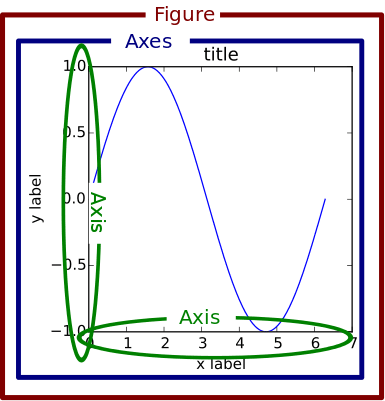

Importante!

- The Figure is the final image that may contain 1 or more Axes.
- The Axes represent an individual plot (don't confuse this with the word "axis", which refers to the x/y axis of a plot).

In [ ]:
#Atributos para explicar melhor a estrutura dos graficos!
print('fig.axes:', fig.axes) #uma figura pode termultiplos axes/graficos
print('ax.figure:', ax.figure) #1 ax esta apenas associado a 1 figura
print('ax.xaxis:', ax.xaxis)
print('ax.yaxis:', ax.yaxis)
print('ax.xaxis.axes:', ax.xaxis.axes)
print('ax.yaxis.axes:', ax.yaxis.axes)
print('ax.xaxis.figure:', ax.xaxis.figure)
print('ax.yaxis.figure:', ax.yaxis.figure)

**Objetos Artist**

Todos os elementos anteriormente apresentados são objetos Artist.
Não vou entrar em muito detalhe no video.

[Anatomy of a figure]

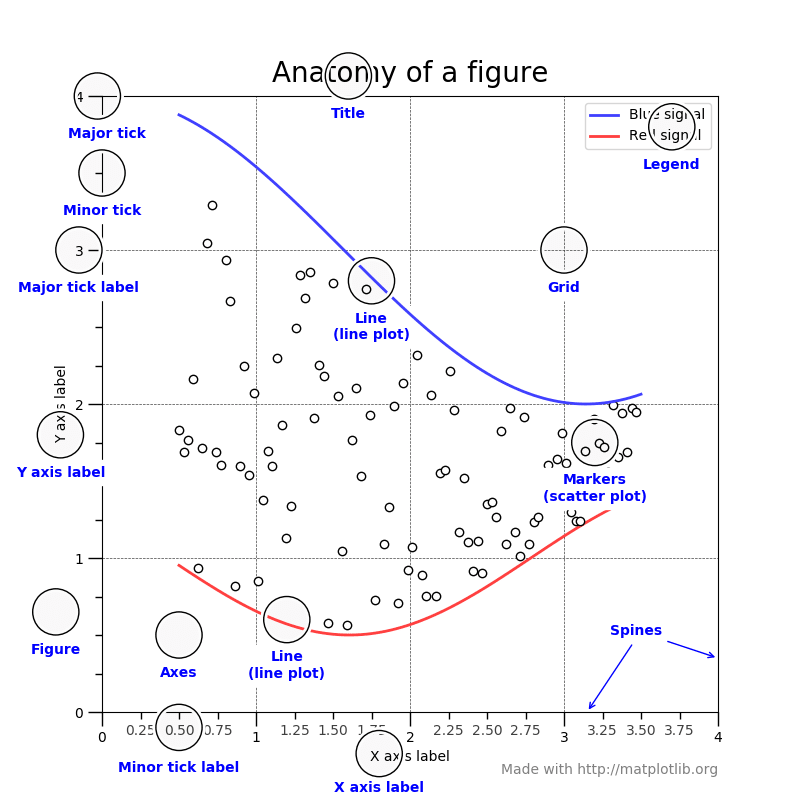

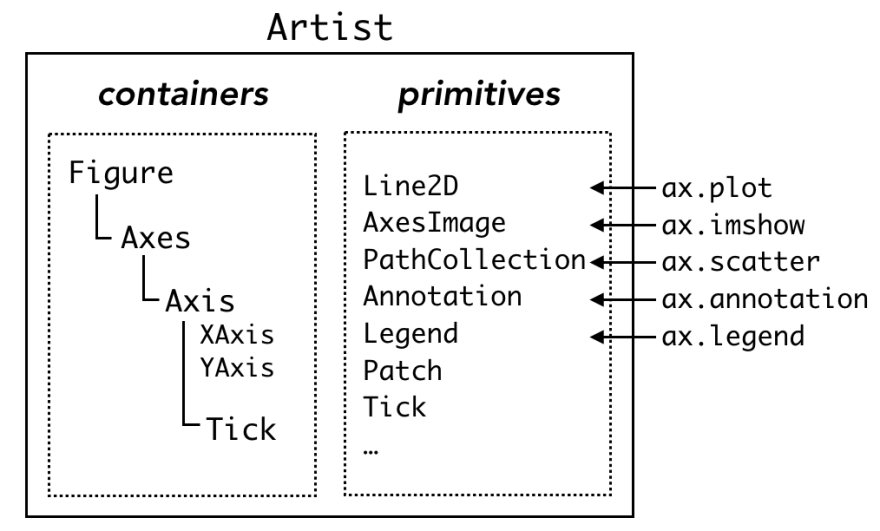

[Estrutura de um objeto Artist]

Existem dois tipos de objetos "Artist"
- Containers: Figure, Axes, Axis e Tick
- Primitives: Line2D, Legend, PathCollection

Os containers podem conter containers de niveis inferiores ou primitivos que são gerados por diversos métodos:

- line2D é gerado pelo ax.plt
- legend é gerado pelo ax.legend

Containers have many "boxes" (Python lists, technicaly) for each type of primitives.

Attributes with a plural name are lists and those with a singular name represent a single object.




**Grafico Simples para explicar**

Plot Simples de 1 e 2 ações

In [ ]:
#Get data / ver episodio 1 ond efaço download dos dados! (Card)
data_MSFT = data.MSFT['Adj Close']
data_AAPL = data.AAPL['Adj Close']

[]
[<matplotlib.lines.Line2D object at 0x7fa478a39ba8>, <matplotlib.lines.Line2D object at 0x7fa4789dd9b0>]


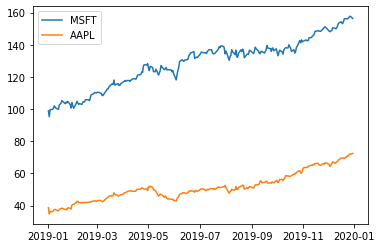

In [ ]:
## Grafico Simples
fig = plt.figure() #Criar Figura
ax = fig.add_subplot(1,1,1) #Adicionar plot à figura
print(ax.lines)
line1 = ax.plot(data_MSFT,label='MSFT')
print(ax.lines)
line2 = ax.plot(data_AAPL,label='AAPL')
print(ax.lines)
ax.legend()

print(line1)
print(line2)

Um dado objeto artist, como o Axes tem atributos e helper metodos.

Frequently-used commands such as ax.plot and ax.scatter are called "helper methods" which add corresponding Artists in appropriate containers and do other miscellaneous jobs.

Por exemplo os Axes has many "set_***", alteram atributos dos axis e tick

Text(0.5, 3.1999999999999993, '')
Text(0.5, 3.1999999999999993, 'Data')
Text(3.200000000000003, 0.5, '')
Text(3.200000000000003, 0.5, 'Adj Close')
Text(0.5, 1.0, '')
Text(0.5, 1.0, 'Grafico Microsoft e Google')


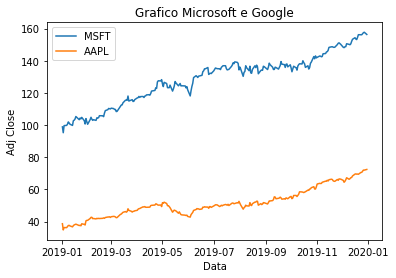

In [ ]:
##Set Values
print(ax.xaxis.label)
ax.set_xlabel('Data') #Altera o atributo label do xaxis
print(ax.xaxis.label)

print(ax.yaxis.label)
ax.set_ylabel('Adj Close')
print(ax.yaxis.label)

print(ax.title)
ax.set_title('Grafico Microsoft e Google')
print(ax.title)

fig

[Extra] Explicar de forma intuitiva a Estrutura do MatplotLib

In [ ]:
# #Exemplo da estrutura
# fig, axs = plt.subplots(2,2)

# axs[0][0].plot(plot_data)
# axs[0][1].plot(plot_data2)
# print(axs[0][0])

# axs[0][0].grid()
# axs[0][0].set_xlabel('Valor X')

# axs[0][1].set_ylabel('Valor Y')
# axs[0][1].legend('OBV')

# #fig.savefig('4plots.png')

**Aplicação para Python Investimentos**

Importar Bibliotecas/Ajustar Estilo

**[1] Customizing Matplotlib with style sheets and rcParams**

Matplotlib uses matplotlibrc configuration files to customize all kinds of properties, which we call 'rc settings' or 'rc parameters'. 

You can control the defaults of almost every property in Matplotlib: figure size and DPI, line width, color and style, axes, axis and grid properties, text and font properties and so on.

---- Using style sheets

The style package adds support for easy-to-switch plotting "styles" with the same parameters as a matplotlib rc file (which is read at startup to configure Matplotlib).

There are a number of pre-defined styles provided by Matplotlib. For example, there's a pre-defined style called "ggplot", which emulates the aesthetics of ggplot (a popular plotting package for R).

https://matplotlib.org/3.3.2/tutorials/introductory/customizing.html

In [ ]:
#Style Sheets
import matplotlib.pyplot as plt

#Diversos Estilos Disponivies / Tambem podem usar estilos personalizados, não vou entrar em detalhe mas deixo o link na descrição para consultarem!
print(plt.style.available)

#Selecionar estilo ggplot
plt.style.use('ggplot') #biblioteca de criação de graficos para R

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


--- rcParams

You can also dynamically change the default rc settings in a python script or interactively from the python shell. All of the rc settings are stored in a dictionary-like variable called matplotlib.rcParams, which is global to the matplotlib package. rcParams can be modified directly, for example:

In [ ]:
print(plt.rcParams['figure.dpi'])
print(plt.rcParams['figure.figsize'])

72.0
[6.0, 4.0]


In [ ]:
#Set Parameters para o grafico ficar maior
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

**[3] Grafico Volumes**  

(Valor da Ação + Volume) - Matplot Lib Suplots


The power of gridspec comes in being able to create subplots that span rows and columns.

https://matplotlib.org/3.3.2/tutorials/intermediate/gridspec.html

(Versão plotly: 

ax = subplot2grid((nrows, ncols), (row, col), rowspan, colspan)

ax1 = fig.subplot2grid((6,1),(0,0),rowspan=5,colspan=1))

Text(0.5, 1.0, 'Volume | Preço')

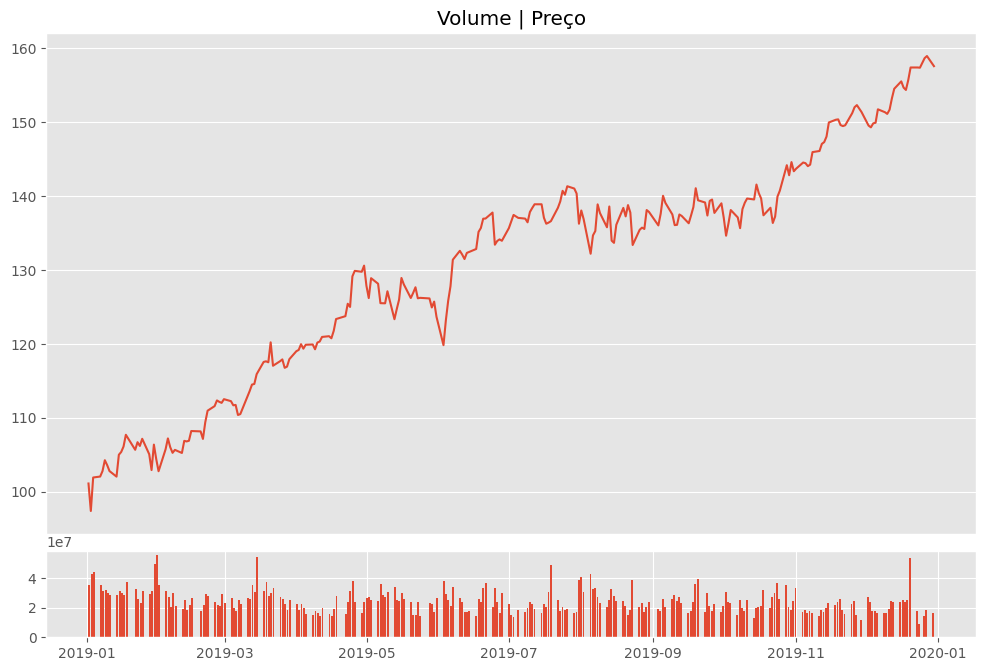

In [ ]:
### É habitual em finanças fazer graficos do valor das ações acompanhado com o Volume
### Explicar Nomenclatura Open, Close, Ação, outra terminologia necessária!!!
### Explicar candle Stick etc

fig = plt.figure() #criar figura

gs = fig.add_gridspec(nrows = 6,ncols = 1) #gs = fig.add_gridspec(nrows, ncols)
ax1 = fig.add_subplot(gs[0:5,0]) #ax = fig.add_subplot(gs[row:row+rowspan, col:col+colspan])
ax2 = fig.add_subplot(gs[5,0])

ax1.plot(data.MSFT.Close)
ax2.bar(data.MSFT.index,data.MSFT.Volume) #Opção 1
#ax2.fill_between(data.MSFT.index,data.MSFT.Volume,0) #Opção 2

#formatar
ax1.axes.get_xaxis().set_visible(False) #hide x axis da figura 1
ax2.xaxis_date() #formatar eixo x da figura 2
ax1.set_title('Volume | Preço') #set title


**[3] Grafico Candle Stick**

Candle Stick Graph - Mais fácil de ler/permite agregar informação OHLC

In [ ]:
!pip install mpl_finance
#matplotlib_finance has been deprecated
#https://matplotlib.org/api/finance_api.html
import mpl_finance as mpf

In [ ]:
#Format Date
import matplotlib.dates as mdates
#Explicar utilidade

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 24})

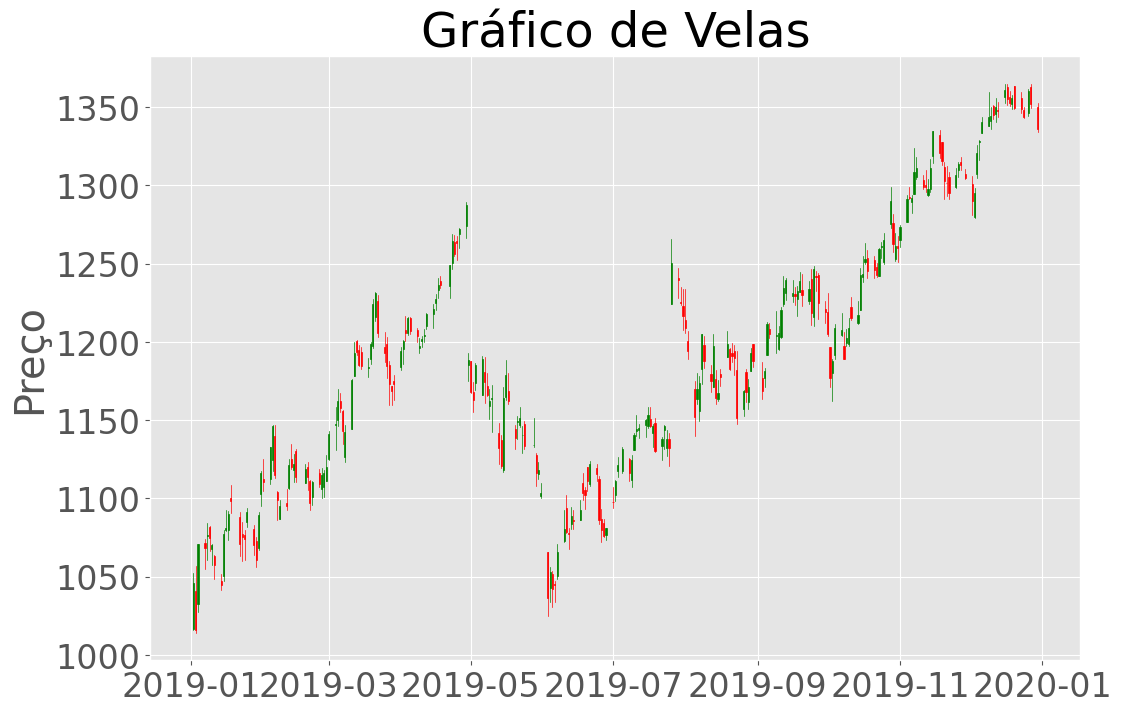

In [ ]:
#Set Data
final_data = data.GOOG.reset_index()
#data.GOOG.reset_index().dtypes
final_data['Date']= final_data['Date'].map(mdates.date2num) #Convert datetime objects to Matplotlib dates (para a função candlestick_ohlc)

#Criar grafico
fig, ax = plt.subplots() #criar figure e axes
mpf.candlestick_ohlc(ax, final_data.values, width=0.5, colorup='g', colordown='r') #Não funciona com string ou datetime64 é necessário converter para matplotlib dates!

#Add labels
#ax.set_xlabel('Data')
ax.set_ylabel('Preço')
ax.set_title('Gráfico de Velas')

# Format time.
ax.xaxis_date() #tratar eixo do X como data
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y")) #formatar os majot tickers
 
#fig.autofmt_xdate()
#plt.gcf().autofmt_xdate()   # Beautify the x-labels
#plt.autoscale(tight=True)

Tornar o grafico dinamico na web

The mpld3 project brings together Matplotlib, the popular Python-based graphing library, and D3js, the popular JavaScript library for creating interactive data visualizations for the web. The result is a simple API for exporting your matplotlib graphics to HTML code which can be used within the browser, within standard web pages, blogs, or tools such as the IPython notebook.

doc: https://mpld3.github.io/


In [ ]:
!pip install mpld3
%matplotlib inline
import mpld3
mpld3.enable_notebook()

#Medium Post: https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1

     |████████████████████████████████| 1.0MB 2.7MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364064 sha256=286ed8d3893a92f69dc6832fad2691423c352f931b6fccda0a168c2258c21fef
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [ ]:
#Set Parameters para o grafico ficar maior
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

#[4] Analise de Indicadores Financeiros

**Importar Dados**

In [ ]:
#Import packages
!pip install yfinance
import yfinance as yf

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

#Set Style
style.use('ggplot')

#Set Parameters para o grafico ficar maior
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 12})

In [ ]:
#Get Data
#Selecionar 5 ativos para analisar e enviar report
input_data = yf.download('MSFT','2020-01-01','2020-12-10').reset_index()
input_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,158.779999,160.729996,158.330002,160.619995,159.352386,22622100
1,2020-01-03,158.320007,159.949997,158.059998,158.619995,157.368179,21116200
2,2020-01-06,157.080002,159.100006,156.509995,159.029999,157.774948,20813700
3,2020-01-07,159.320007,159.669998,157.320007,157.580002,156.336395,21634100
4,2020-01-08,158.929993,160.800003,157.949997,160.089996,158.826569,27746500


**On-Balance Volume**

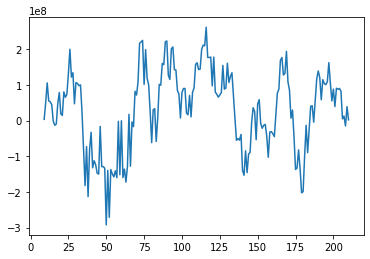

In [ ]:
#Esclarecer o que significa cada indicador
#https://www.investopedia.com/terms/t/technical-analysis-of-stocks-and-trends.asp
#https://www.investopedia.com/top-7-technical-analysis-tools-4773275

#Disclaimer: Não sou nenhum especialista da bolsa de valores e o objetivo destes videos é de entretenimento e mostrar casos onde se podem aplicar a programação/automação
#Compute On-Balance Volume
#https://www.investopedia.com/terms/o/onbalancevolume.asp

data = input_data

#Identificar Variação das ações
data['Variação'] = -1
data.loc[data.Close>data.Close.shift(1),'Variação'] = 1
data.loc[data.Close == data.Close.shift(1),'Variação'] = 0
data['Var * Volume'] = data['Variação'] * data['Volume']
data['OBV'] = data['Var * Volume'].rolling(10).sum()

data['OBV'].plot()

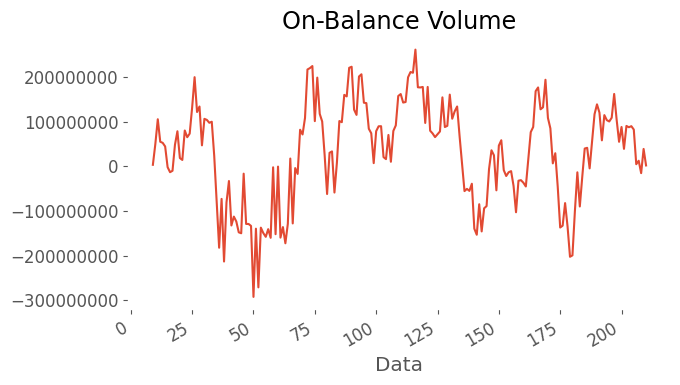

In [ ]:
##Formatar Grafico

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot()

ax.ticklabel_format(useOffset=False,style='plain')
ax.plot(data['OBV'])

ax.set_xlabel('Data')
ax.set_title('On-Balance Volume')
ax.grid(False)
ax.set_facecolor('white')
#ax.xaxis_date()

fig.autofmt_xdate()
fig.savefig('fig_OBV.png')


*Interpretação:*

When OBV is rising, it shows that buyers are willing to step in and push the price higher. When OBV is falling, the selling volume is outpacing buying volume, which indicates lower prices. In this way, it acts like a trend confirmation tool. If price and OBV are rising, that helps indicate a continuation of the trend.

**Accumulation/Distribution**

In [ ]:
data = input_data
data['CMFV'] = ((data.Close - data.Low)-(data.High - data.Close))/(data.High - data.Low)
data['Volume * CMFV'] = data['Volume'] * data['CMFV']
data['AD'] = data['Volume * CMFV'].rolling(10).sum()

data['AD'].plot()

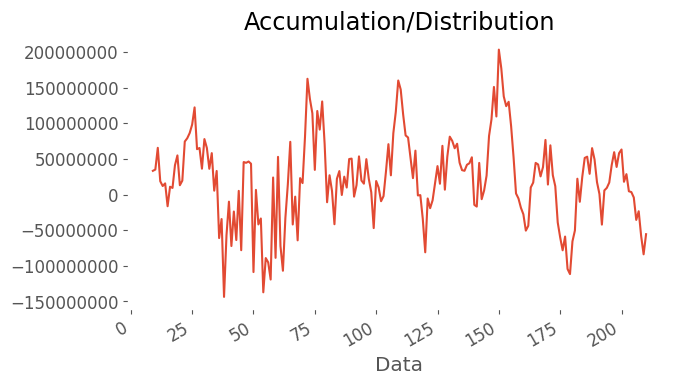

In [ ]:
##Formatar Grafico

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot()

ax.ticklabel_format(useOffset=False,style='plain')
ax.plot(data['AD'])

ax.set_xlabel('Data')
ax.set_title('Accumulation/Distribution')
ax.grid(False)
ax.set_facecolor('white')
fig.autofmt_xdate()
fig.savefig('fig_AcDist.png')


**Average Directional Index**

In [ ]:
#Load data from excel

#Selecionar a worksheet
folha_calculo = gc.open('dados_teste') #Get Spreadsheet
pagina = folha_calculo.get_worksheet(0) #Get Worksheet

## Pandas Dataframe and Google Sheets
import pandas as pd

#Importar dados para dataframe
dataframe = pd.DataFrame(pagina.get_all_records())
dataframe.head()

In [ ]:
import numpy as np
data = dataframe.copy()

## Positive and Negative Direcional Movement
data['+DM'] = 0
data.iloc[0, data.columns.get_loc('+DM')] = np.nan
data.loc[(data.High - data.High.shift(1)) > (data.Low.shift(1) - data.Low),'+DM'] = data.High - data.High.shift(1)
data.loc[(data.High - data.High.shift(1)) < 0,'+DM'] = 0

data['-DM'] = 0
data.iloc[0, data.columns.get_loc('-DM')] = np.nan
data.loc[(data.Low.shift(1) - data.Low) > (data.High - data.High.shift(1)),'-DM'] = data.Low.shift(1) - data.Low
data.loc[(data.Low.shift(1) - data.Low) < 0,'-DM'] = 0

## True Range
data['Value 1'] = abs(data.High - data.Low)
data['Value 2'] = abs(data.High - data.Close.shift(1))
data['Value 3'] = abs(data.Low - data.Close.shift(1))

data.iloc[0, data.columns.get_loc('Value 1')] = np.nan

data['TR'] = data[['Value 1','Value 2','Value 3']].max(axis=1)

In [ ]:
#### DM14, DM14,TR14
window = 14

data['+DM14'] = data['+DM'].rolling(window).sum()
data['-DM14'] = data['-DM'].rolling(window).sum()
data['TR14'] = data['TR'].rolling(window).sum()
first = data['+DM14'].first_valid_index()

for index, row in data.iterrows():
  if index == first:
    prev_plus_dm = row['+DM14']
    prev_minus_dm = row['-DM14']
    prev_tr = row['TR14']
  elif index > first:
    data.loc[index,'+DM14']= prev_plus_dm - prev_plus_dm/window + row['+DM']
    prev_plus_dm = data.loc[index,'+DM14']

    data.loc[index,'-DM14']= prev_minus_dm - prev_minus_dm/window + row['-DM']
    prev_minus_dm = data.loc[index,'-DM14']

    data.loc[index,'TR14']= prev_tr - prev_tr/window + row['TR']
    prev_tr = data.loc[index,'TR14']

data['+DI14'] = (data['+DM14']/data['TR14'])*100
data['-DI14'] = (data['-DM14']/data['TR14'])*100

data['DI14 dif'] = abs(data['+DI14'] - data['-DI14'])
data['DI14 sum'] = data['+DI14'] + data['-DI14']

data['DX'] = (data['DI14 dif']/data['DI14 sum'])*100

#ADX
data['ADX'] = data['DX'].rolling(window).mean()
first = data['ADX'].first_valid_index()

for index, row in data.iterrows():
  if index == first:
    prev = row['ADX']
  elif index > first:
    data.loc[index,'ADX']= ((window-1)*prev + row['DX'])/window
    prev = data.loc[index,'ADX']

data['ADX'].plot()

**Aroon Indicator**

In [ ]:
last_25p = data.tail(25).reset_index()
period_since_25p_high = 25 - last_25p[last_25p['High'] == last_25p['High'].max()].index[0]
aroon_up = (25 - period_since_25p_high)*100
aroon_up

1100

In [ ]:
last_25p = data.tail(25).reset_index()
period_since_25p_low = 25 - last_25p[last_25p['Low'] == last_25p['Low'].min()].index[0]
period_since_25p_low
aroon_down = (25 - period_since_25p_low)*100
aroon_down

In [ ]:
aroon_oscillator = aroon_up - aroon_down
aroon_oscillator

NameError: ignored

#[5] Gerar Report PDF

In [ ]:
## 1) Selecionar Stocks
## 2) Calcular Indicadores
## 3) Gerar Report

## User Input: 
# Stocks
tickers = 'GM'

#dates
start = '2020-05-01'
end = '2020-10-01'

In [ ]:
!pip install yfinance

In [ ]:
## Get Fundamental Data
import yfinance as yf
msft = yf.Ticker(tickers)

keys_to_extract = ['market','longName','longBusinessSummary','industry','marketCap','priceToBook','website','symbol','shortName']
a_subset = {key: msft.info[key] for key in keys_to_extract}
print(a_subset)

{'market': 'us_market', 'longName': 'General Motors Company', 'longBusinessSummary': 'General Motors Company designs, builds, and sells cars, trucks, crossovers, and automobile parts worldwide. The company operates through GM North America, GM International, Cruise, and GM Financial segments. It markets its vehicles primarily under the Buick, Cadillac, Chevrolet, GMC, Holden, Baojun, and Wuling brand names. The company also sells trucks, crossovers, and cars to dealers for consumer retail sales, as well as to fleet customers, including daily rental car companies, commercial fleet customers, leasing companies, and governments. In addition, it offers safety and security services for retail and fleet customers, including automatic crash response, emergency services, crisis assist, stolen vehicle assistance, roadside assistance, and turn-by-turn navigation, as well as connected services comprising mobile applications for owners to remotely control their vehicles and electric vehicle owners

In [ ]:
## Get Stock data
data = yf.download(tickers,start=start,end=end)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-01,21.650000,21.760000,20.799999,20.900000,20.900000,17874500
2020-05-04,20.450001,20.879999,20.120001,20.750000,20.750000,16188800
2020-05-05,21.250000,21.969999,21.120001,21.260000,21.260000,17802300
2020-05-06,23.049999,23.650000,21.830000,21.889999,21.889999,34430500
2020-05-07,22.180000,22.980000,22.030001,22.440001,22.440001,16977100


https://pyfpdf.readthedocs.io/en/latest/reference/cell/index.html

https://stackoverflow.com/questions/51864730/python-what-is-the-process-to-create-pdf-reports-with-charts-from-a-db

In [ ]:
!pip install fpdf
from fpdf import FPDF

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40721 sha256=d3ccab90c8916c4999ba6e36d321fffc426e452cb431f041e56bfe25a804d1f4
  Stored in directory: /root/.cache/pip/wheels/9a/e9/77/4554ff5c99bc3f487c8d69620d8c41d99d54e9c54ab20ef4c9
Successfully built fpdf


In [ ]:
a_subset['symbol']

'GM'

In [ ]:
symbol = a_subset['symbol']
pdf = FPDF('P', 'mm', 'A4')
pdf.add_page()
pdf.set_font('arial','B', 18) #'B' Bold

#Titulo
pdf.cell(190, 10, f'Relatório Análise Empresa {symbol}',1,1,align='C')
pdf.cell(60,10,'',0,1)

#Adicionar Linha
def add_row(bold_1,text_1,bold_2,text_2):
  #Linha 1
  pdf.set_font('arial','B', 10) #'B' Bold
  pdf.cell(30, 10, bold_1, 1,0)
  pdf.set_font('arial','', 10) #'B' Bold
  pdf.cell(65, 10, text_1, 1,align='C')
  pdf.set_font('arial','B', 10) #'B' Bold
  pdf.cell(30, 10, bold_2, 1,0)
  pdf.set_font('arial','', 10) #'B' Bold
  pdf.cell(65, 10, text_2, 1,1,align='C')

#Linha 1
add_row('Long Name:',a_subset['longName'],'Short Name:',a_subset['shortName'])
#Linha 2
add_row('Market:',a_subset['market'],'Industry',a_subset['industry'])
#Linha 3
add_row('MarketCap:',str(a_subset['marketCap'])+' $','PriceToBook',str(round(a_subset['priceToBook'],2)) + ' $')

#Graficos
def add_row_image(title,text,img_path):
  #Criar Espaço
  pdf.cell(60,10,'',1,1)
  pdf.set_font('arial','B', 12) #'B' Bold
  prev = pdf.get_y()
  pdf.cell(60, 10, title, 1,1)
  pdf.set_font('arial','', 10) #'B' Bold
  pdf.multi_cell(95, 10, text, 1,1)
  next = pdf.get_y()
  dif = abs(prev - next)
  pdf.image(img_path, x = pdf.get_x() + 95, y = pdf.get_y() - dif, w = 95, h = dif, type ='', link = '')

img_path = 'fig_OBV.png'
text = '''On-balance volume (OBV) is a technical indicator of momentum, using volume changes to make price predictions.
OBV shows crowd sentiment that can predict a bullish or bearish outcome.'''
add_row_image('On-Balance Volume',text,img_path)

img_path = 'fig_AcDist.png'
text = '''If the price is rising but A/D is falling, it signals underlying weakness and a potential decline in price.
If the price of an asset is falling but A/D is rising, it signals underlying strength and the price may start to rise.'''
add_row_image('Ac/Dist',text,img_path)

pdf.output('test.pdf', 'F')

''

#[5] Enviar report por Email